
      Question-A
      I observed that the algorthim didn't converge. This outcome is aligned with the 
      fact that the data is not linearly separable.
      

      Question-B
      I ran the Pocket learning algorithm for 1 million iterations to find the 
      final hyothesis function. To report the in-sample-error, only 100 iterations
      were used. The plot also shows the in-sample-error computed after running
      pocket algorithm on polynomial features.
      


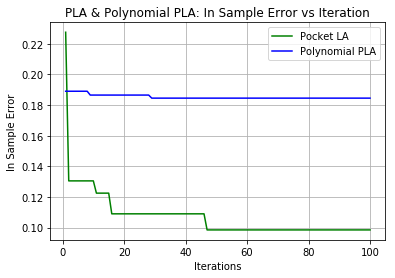


      Question-C
      The below plot shows the generated data points and the final hypothesis learnt
      from pocket-learning-algortihm and from fitting linear regression for classification.
      


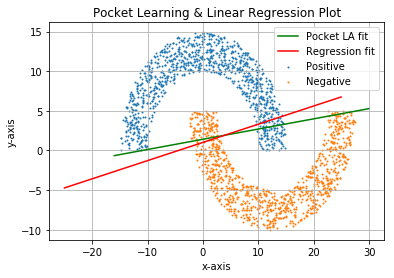


      Question-D
      With pocket-learning-algorithm the execution time was 0.360 and classification error 0.092.
      With linear regression the execution time was 0.00045 and classification error 0.103. Overall
      linear regression took less time to converge and both the algorithm were pretty close
      with the classification error.
      Finally the weight obtained from the linear regression was:
      [-0.1020099  -0.02304747  0.1002773 ]
    

      Question-E
      On running the PLA with transformed features didn't converge, similar to Question-A.
      For in-sample-error, refer to the plot shown in Question-B. The weights obtained on the 
      new feature set defined as [1, x, y, x**2, y**2, x*y, y*x**2, x*y**2, x**3, y**3] was: [-11.0, 10.787737791609732, -5.397542448199571, -33.026342211171155, -29.58132658400997, 26.94802894572564, 9.333800431047035, -7.012381709120867, -1.5483967562104697, 7.076102403607155]
      


In [2]:
# Question 2
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

# parameters
rad = 10
thk = 5

# define functions 
# n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad, thk, sep, n, x1=0, y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        # uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue
    
    return top, bottom

# Defining a polynomial function
def polynomial_transform(d):
    x, y = d[0], d[1]
    return [x, y, x**2, y**2, x*y, y*x**2, x*y**2, x**3, y**3]

# Define the sign function which will return the sign of product of weight vector and x vector.

def sign(w, x):
    s = np.sign(np.dot(w,x))
    return s if s != 0 else 1

# Defining the PLA 
def pla_single_update(data, w):
    # Since data is not linearly separable
    # we will find atleast one misclassified data point
    # and hence the while loop will always exit
    w_next = w
    while True:
        d = data[random.randint(0,2*1000-1)]
        x, y = d[:-1], d[-1]
        if sign(w, x) != y:
            w_next = w + x*y    
            break        
    return w_next

def sign2(x):
    if x >= 0:
        return 1
    else:
        return -1
    
def Judge(x,w):
    flag = 1
    for i in x:
        if sign2(i[:3].dot(w))*i[-1] < 0:
            flag = 0
            break
    return flag   

def train_perceptron_wu(data):
    #number of iterations
    s = 0
    #initilizew=[0,0]
    w=np.array([0,0,0],dtype = float)
    while (Judge(data,w) == 0):
        i = data[random.randint(0,2*1000-1)]
        if sign2(i[:3].dot(w))*i[-1]<0:
            w += i[-1]*i[:3]
            s += 1
            print("update the weight -> %s"%(s))            
    return w

def pocket_alogorithm(data, itr):
    w = np.array([0 for _ in range(data.shape[1]-1)])
    ein = []
    for _ in range(itr):
        w_next = pla_single_update(data, w)
        x, y = data[:,0:-1], data[:,-1]
        ein_old = np.mean(np.sign(np.dot(x, w)) != y)
        ein_new = np.mean(np.sign(np.dot(x, w_next)) != y)        
        if ein_new <= ein_old:
            w = w_next
            ein.append(ein_new)
        else:
            ein.append(ein_old)
    return w, ein
        
def get_sep_data(sep):
    # reorganize data and randomize
    top, bottom = generatedata(rad, thk, sep, 2000)

    X1 = [i[0] for i in top]
    Y1 = [i[1] for i in top]

    X2 = [i[0] for i in bottom]
    Y2 = [i[1] for i in bottom]

    x1 = [[1] + i + [1] for i in top]
    x2 = [[1] + i + [-1] for i in bottom]
    data = x1 + x2

    data = np.array(data)
    np.random.shuffle(data)
    return data, [X1, Y1, X2, Y2]

def get_sep_data_transform(sep):
    # reorganize data and randomize
    top, bottom = generatedata(rad, thk, sep, 2000)

    X1 = [i[0] for i in top]
    Y1 = [i[1] for i in top]

    X2 = [i[0] for i in bottom]
    Y2 = [i[1] for i in bottom]

    x1 = [[1] + polynomial_transform(i) + [1] for i in top]
    x2 = [[1] + polynomial_transform(i) + [-1] for i in bottom]
    data = x1 + x2

    data = np.array(data)
    np.random.shuffle(data)
    return data, [X1, Y1, X2, Y2]

# Set the separation to -5 for data generation
sep = -5

# Question 3a
# The PLA will not converge as the data is not linearly separable
# data, S = get_sep_data(sep)
# w = train_perceptron_wu(data)
print("""
      Question-A
      I observed that the algorthim didn't converge. This outcome is aligned with the 
      fact that the data is not linearly separable.
      """)

# Question 3b

print("""
      Question-B
      I ran the Pocket learning algorithm for 1 million iterations to find the 
      final hyothesis function. To report the in-sample-error, only 100 iterations
      were used. The plot also shows the in-sample-error computed after running
      pocket algorithm on polynomial features.
      """)

itr = 1000
plot_itr = 100
data, S = get_sep_data(sep)
start = time.time()
pw, ein = pocket_alogorithm(data, itr)
end = time.time()

# Total execution time in Pocket learning Alg & error
pocket_la_exec_time = end - start
pocket_la_err = ein[-1]

plt.plot(np.arange(1,plot_itr+1,1), ein[:plot_itr], color = "g", label = "Pocket LA")
plt.title("PLA & Polynomial PLA: In Sample Error vs Iteration")
plt.xlabel("Iterations")
plt.ylabel("In Sample Error")
plt.grid()

# Question 3e # Moving it here to combine results inside one plot

# Run Pocket LA with transformed data set, Q2-b
data, S = get_sep_data_transform(sep)
polypw, poly_ein = pocket_alogorithm(data, itr)
plt.plot(np.arange(1,plot_itr+1,1), poly_ein[:plot_itr], color = "b", label = "Polynomial PLA")
plt.legend()
plt.show()

# print("Polynomial PLA transformed w -> %s and error %s"%(w, ein[-1]))

# # Question 3c
print("""
      Question-C
      The below plot shows the generated data points and the final hypothesis learnt
      from pocket-learning-algortihm and from fitting linear regression for classification.
      """)
plt.scatter(S[0], S[1], s = 1, label="Positive")
plt.scatter(S[2], S[3], s = 1, label="Negative")
x=np.arange(-16,30,0.05) 
y=np.array([(x[i]*pw[1]+pw[0])/(-pw[2]) for i in range(len(x))])
plt.plot(x, y, color = "g", label = "Pocket LA fit")
plt.title("Pocket Learning & Linear Regression Plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid()


# # Question 3d
data, S = get_sep_data(sep)
X, y = data[:,0:-1], data[:,-1]
start = time.time()
Psudo_X = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X))
W_lin = np.array(np.matmul(Psudo_X,y))
end = time.time()
lg_exec_time = end - start
err_lr = np.mean(np.sign(np.dot(X, W_lin)) != y)

X3=np.arange(-25,25,0.05) 
Y3=np.array([(X3[i]*W_lin[1]+W_lin[0])/(-W_lin[2]) for i in range(len(X3))])
plt.plot(X3,Y3, color = "r", label = "Regression fit")
plt.legend()
plt.show()

print("""
      Question-D
      With pocket-learning-algorithm the execution time was %s and classification error %s.
      With linear regression the execution time was %s and classification error %s. Overall
      linear regression took less time to converge and both the algorithm were pretty close
      with the classification error.
      Finally the weight obtained from the linear regression was:
      %s
    """%("{0:.3f}".format(pocket_la_exec_time), "{0:.3f}".format(pocket_la_err), 
             "{0:.5f}".format(lg_exec_time), "{0:.3f}".format(err_lr), W_lin) )

print("""
      Question-E
      On running the PLA with transformed features didn't converge, similar to Question-A.
      For in-sample-error, refer to the plot shown in Question-B. The weights obtained on the 
      new feature set defined as [1, x, y, x**2, y**2, x*y, y*x**2, x*y**2, x**3, y**3] was: %s
      """%(list(polypw)))

# Question 3e

# Run perceptron with transformed data set, Q2-a
# The algorithm didn't converge
# w = train_perceptron_wu(data)